# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Febrie Tsani Sovranita
- **Email:** zzuiii1934@gmail.com
- **ID Dicoding:** febrie_tsani_sovranita_fxEt

# Latar Belakang

Sistem berbagi sepeda (Bike-sharing) adalah generasi baru dari penyewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, penyewaan, dan pengembalian
kembali telah menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan mengembalikannya di posisi lain. Saat ini, terdapat lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena peran penting mereka dalam masalah lalu lintas, lingkungan dan kesehatan.

Terlepas dari aplikasi dunia nyata yang menarik dari sistem berbagi sepeda, karakteristik data yang dihasilkan oleh sistem ini membuatnya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan dan kedatangan secara eksplisit dicatat dalam sistem ini. Fitur ini mengubah sistem berbagi sepeda menjadi jaringan sensor virtual yang dapat digunakan untuk merasakan mobilitas di kota. Dengan demikian, diharapkan sebagian besar kejadian penting di kota dapat dideteksi melalui pemantauan data ini.

## Menentukan Pertanyaan Bisnis

- Pada musim apa permintaan penyewaan sepeda paling tinggi dan paling rendah?
- Seberapa besar hari libur berdampak pada jumlah penyewaan sepeda?
- Faktor mana yang memiliki pengaruh terbesar terhadap jumlah penyewaan sepeda?
- Apakah pengguna Registred dan pengguna casual memiliki pola penggunaan penyewaan sepeda yang berbeda?
- Pada jam berapa permintaan penyewaan sepeda paling tinggi?
- Bagaimana perkembangan jumlah penyewaan sepeda dari tahun 2011 hingga tahun 2012?



## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# memuat tabel day menjadi sebuah Dataframe
df_day = pd.read_csv("/content/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# memuat tabel hour menjadi sebuah Dataframe
df_hour = pd.read_csv("/content/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

Keterangan Dataset:

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : (0 : not holiday, 1: holiday)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


### Assessing Data

In [4]:
# Mengecek tipe data pada dataframe df_day
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


dapat dilihat bahwa hampir semua kolom sudah memiliki tipe data numerik sehingga akan memudahkan dalam proses analisis data selanjutnya.
namun ada satu kolom yaitu dteday bertipe data object, hal ini tidak sesuai karena seharusnya untuk isian data tanggal seharusnya bertipe data **datetime**, maka dari itu harus kita ubah tipe datanya ke dalam **datetime**





In [5]:
# Mengecek tipe data pada dataframe df_hour
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


sama dengan tabel df_day, tabel df_hour memiliki kolom dteday bertipe data object maka dari itu harus kita ubah tipe datanya ke dalam **datetime**

In [6]:
# Melihat jumlah baris dan kolom pada tabel df_day
df_day.shape

(731, 16)

tabel df_day memiliki total 731 baris dan 16 kolom

In [7]:
# Melihat jumlah baris dan kolom pada tabel df_hour
df_hour.shape

(17379, 17)

tabel df_hour memiliki total 17379 baris dan 17 kolom

In [8]:
# Mengecek isi data df_day apakah terdapat duplikasi atau tidak
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
# Mengecek isi data df_hour apakah terdapat duplikasi atau tidak
print("Jumlah duplikasi: ", df_hour.duplicated().sum())

Jumlah duplikasi:  0


df_day dan df_hour tidak memiliki isi data yang duplikat

In [10]:
# memeriksa parameter statistik dari kolom numerik yang terdapat dalam df_day
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
# memeriksa parameter statistik dari kolom numerik yang terdapat dalam df_hour
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [12]:
# mengecek nilai null pada df_day
df_day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [13]:
# mengecek nilai null pada df_hour
df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


pada df_day dan df_hour tidak terdapat nilai null

### Cleaning Data

Pada tahap ini, kita akan membersihkan berbagai masalah yang telah teridentifikasi dalam proses assessing data:

adapun tahapan yang akan dilakukan pada cleaning data sebagai berikut:

- rename kolom dteday, yr, mnth, hr, hum, cnt agar lebih mudah untuk dipahami
- merubah tipe data dteday yang awalnya object menjadi format datetime
- Drop columns yang tidak penting seperti:
  - kolom instant, kolom instant di drop karena kolom instant hanya sebagai index dan apabila dihapus tidak berpengaruh terhadap variabel lain
  - kolom working day, dihapus karena pada kolom holiday dan weekday sudah mewakili keterangan hari weekdays dan weekend
- Meskipun isi kolom `temp` `atemp` `hum` dan `windspeed` sudah dinormalisasi, agar mudah dipahami kita kembalikan lagi nilainya ke skala aslinya



---



**Rename nama kolom `dteday`, `yr`, `mnth`, `hr`, `hum`, `cnt` pada dataframe df_day dan df_hour**

In [14]:
# Rename kolom pada df_day dan df_hour
rename_columns_df_day = {
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hum': 'humidity',
    'cnt': 'total_rentals'
}
rename_columns_df_hour = {
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'hum': 'humidity',
    'cnt': 'total_rentals'
}

df_day.rename(columns=rename_columns_df_day, inplace=True)
df_hour.rename(columns=rename_columns_df_hour, inplace=True)

# Menampilkan nama kolom setelah perubahan
df_day.columns, df_hour.columns

(Index(['instant', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
        'casual', 'registered', 'total_rentals'],
       dtype='object'),
 Index(['instant', 'date', 'season', 'year', 'month', 'hour', 'holiday',
        'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'humidity',
        'windspeed', 'casual', 'registered', 'total_rentals'],
       dtype='object'))

**Insight:**
- berdasarkan hasil diatas, bahwa kita berhasil merubah/rename nama kolom

**Merubah tipe data dteday(date) yang awalnya object menjadi format datetime**



In [15]:
# Mengubah tipe data kolom 'date' menjadi datetime
df_day['date'] = pd.to_datetime(df_day['date'])
df_hour['date'] = pd.to_datetime(df_hour['date'])

# Cek apakah tipe data sudah berubah
df_day.info()
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        731 non-null    int64         
 1   date           731 non-null    datetime64[ns]
 2   season         731 non-null    int64         
 3   year           731 non-null    int64         
 4   month          731 non-null    int64         
 5   holiday        731 non-null    int64         
 6   weekday        731 non-null    int64         
 7   workingday     731 non-null    int64         
 8   weathersit     731 non-null    int64         
 9   temp           731 non-null    float64       
 10  atemp          731 non-null    float64       
 11  humidity       731 non-null    float64       
 12  windspeed      731 non-null    float64       
 13  casual         731 non-null    int64         
 14  registered     731 non-null    int64         
 15  total_rentals  731 non-

**Insight:**

- berdasarkan hasil diatas didapat bahwa kolom date pada df_day dan df_hour berhasil diubah ke tipe data datetime64[ns]

**Drop Columns `instant` dan `workingday` pada df_day dan df_hour**

In [16]:
# Menghapus kolom 'instant' dan 'workingday' dari df_day dan df_hour
df_day.drop(columns = ['instant','workingday'] , inplace = True)
df_hour.drop(columns = ['instant','workingday'] , inplace = True)

In [17]:
# Menampilkan list kolom setelah penghapusan
df_day.columns, df_hour.columns

(Index(['date', 'season', 'year', 'month', 'holiday', 'weekday', 'weathersit',
        'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
        'total_rentals'],
       dtype='object'),
 Index(['date', 'season', 'year', 'month', 'hour', 'holiday', 'weekday',
        'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
        'registered', 'total_rentals'],
       dtype='object'))

**Insight:**
- berdasarkan hasil diatas didapat bahwa kolom `instant` dan `workingday` pada df_day dan df_hour telah berhasil dihapus

**Konversi nilai pada kolom `temp` `atemp` `hum` dan `windspeed` yang telah dinormalisasi ke nilai skala aslinya agar mudah dipahami**

In [18]:
# Konversi nilai ke skala asli
df_day['temp'] = df_day['temp'] * 41
df_day['atemp'] = df_day['atemp'] * 50
df_day['humidity'] = df_day['humidity'] * 100
df_day['windspeed'] = df_day['windspeed'] * 67

df_hour['temp'] = df_hour['temp'] * 41
df_hour['atemp'] = df_hour['atemp'] * 50
df_hour['humidity'] = df_hour['humidity'] * 100
df_hour['windspeed'] = df_hour['windspeed'] * 67


In [19]:
# Menampilkan hasil konversi nilai pada kolom temp, atemp,hum dan windspeed
df_day.head()

,date,season,year,month,holiday,weekday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_rentals
0,2011-01-01,1,0,1,0,6,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
# Menampilkan hasil konversi nilai pada kolom temp, atemp,hum dan windspeed
df_hour.head()

,date,season,year,month,hour,holiday,weekday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_rentals
0,2011-01-01,1,0,1,0,0,6,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,1,9.84,14.395,75.0,0.0,0,1,1


**Insight:**
- berdasarkan hasil diatas didapat bahwa proses konversi nilai pada kolom `temp` `atemp` `hum` dan `windspeed` berhasil dilakukan.
Adapun keterangan satuan pada setiap kolom sebagai berikut:
  - `temp` sekarang menjadi satuan derajat Celsius (°C)
  - `atemp` (suhu yang terasa) sekarang menjadi satuan derajat Celsius (°C)
  - `hum` sekarang menjadi dalam persen(%)
  - `windspeed` sekarang menjadi dalam km/jam

In [21]:
# Menyimpan dataset hasil proses Data Wrangling kedalam bentuk .csv
df_hour.to_csv("data_clean_hour.csv", index=False)
df_day.to_csv("data_clean_day.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore df_day

In [22]:
# Melihat statistik deskriptif numerik dan kategorikal
df_day.describe(include="all")

,date,season,year,month,holiday,weekday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_rentals
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


berdasarkan parameter statistik diatas dapat diketahui bahwa:

- total jumlah penyewaan sepeda per hari paling sedikit 22 sepeda/hari dan total jumlah penyewaan sepeda per hari paling banyak 8714 sepeda/hari

- rata - rata penyewaan sepeda per hari untuk pengguna casual yaitu 848/hari sedangkan pengguna registered yaitu 3656/hari, ini berarti bahwa sebagian besar penyewa sepeda adalah pengguna registered

- total rata - rata penyewaan sepeda per hari yaitu 4504/hari

- Temperatur rata - rata nyata `temp` dan terasa `atemp` sekitar 20-24°C, dengan nilai tertinggi sekitar 35°C-42°C

**Mengeksplor distribusi total penyewaan sepeda berdasarkan musim dan total_rentals**

In [23]:
# mengelompokkan data berdasarkan kolom season dan total_rentals
season_stats_day = df_day.groupby('season')['total_rentals'].agg(['mean', 'sum', 'std', 'count'])
print(season_stats_day)

               mean      sum          std  count
season                                          
1       2604.132597   471348  1399.942119    181
2       4992.331522   918589  1695.977235    184
3       5644.303191  1061129  1459.800381    188
4       4728.162921   841613  1699.615261    178


**Insight:**

berdasarkan hasil diatas, didapat bahwa pada musim 3(fall/musim gugur) mendapatkan total jumlah penyewaan sepeda terbanyak sebesar 1061129 sepeda dan total jumlah penyewaan sepeda paling sedikit terjadi pada musim 1 (springer/musim semi) sebesar 471348 sepeda.

Dengan rata - rata penyewaan sepeda paling rendah pada musim 1 (springer/musim semi) 2604/hari sedangkan rata - rata penyewaan sepeda paling rendah terjadi pada musim 3(fall/musim gugur) 5644/hari

**Jumlah total penyewaan sepeda pada hari libur**

In [24]:
# mengelompokkan data berdasarkan kolom holiday dan total_rentals
holiday_stats_day = df_day.groupby('holiday')['total_rentals'].agg(['mean', 'sum', 'std', 'count'])
holiday_stats_day

,mean,sum,std,count
holiday,,,,
0,4527.104225,3214244,1929.013947,710
1,3735.000000,78435,2103.350660,21


**Insight:**

berdarsarkan hasil diatas, didapat bahwa kebanyakan orang menyewa sepeda pada hari kerja weekdays dengan rata - rata penyewaan sepeda 4527/hari dengan total penyewaan sepeda mencapai 3214244

Sedangkan pada hari libur orang-orang jarang menyewa sepeda, ini dapat dibuktikan dengan dengan rata - rata penyewaan sepeda 3735/hari dengan total penyewaan sepeda mencapai 78435


**Mengecek korelasi antara total_rentals dan variabel numerik lainnya**

In [25]:
# Korelasi antara total_rentals dan variabel numerik lainnya
correlations_day = df_day.corr()['total_rentals'].sort_values(ascending=False)
correlations_day

,total_rentals
total_rentals,1.000000
registered,0.945517
casual,0.672804
atemp,0.631066
date,0.628830
temp,0.627494
year,0.566710
season,0.406100
month,0.279977
weekday,0.067443


**Insight:**

Berdasarkan hasil diatas, didapat bahwa hampir semua variabel berpengaruh positif terhadap penyewaan sepeda, diantaranya sebagai berikut:
- jumlah pengguna `registered` paling berpengaruh positif sebesar 0.945517,
- diikuti dengan variabel pengguna `casual` `atemp` `date` `temp` `year` `season`	`month` `weekday`.

sedangkan variabel `holiday` `humidity` `windspeed` `weathersit` memiliki dampak negatif terhadap penyewaan sepeda.

**explore data pada pola perbedaan pengguna casual vs registered**

In [26]:
# rangkuman Statistik perbedaan pengguna casual vs registered
df_day[['casual', 'registered']].describe()

,casual,registered
count,731.000000,731.000000
mean,848.176471,3656.172367
std,686.622488,1560.256377
min,2.000000,20.000000
25%,315.500000,2497.000000
50%,713.000000,3662.000000
75%,1096.000000,4776.500000
max,3410.000000,6946.000000


**Insight:**

- pengguna registered memiliki rata - rata penyewaan per hari jauh lebih tinggi sekitar 3656 dibandingkan dengan pengguna casual sekitar 848
- variabilitas yang dimiliki pengguna registered lebih tinggi (std ≈ 1560) dibandingkan pengguna casual (std ≈ 687), ini menunjukkan bahwa terdapat variasi nilai suatu data dari waktu ke waktu yang lebih besar dalam penyewaan sepeda oleh pengguna registered.

### Explore df_hour

In [27]:
# Melihat statistik deskriptif numerik dan kategorikal
df_hour.describe(include="all")

,date,season,year,month,hour,holiday,weekday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_rentals
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599


berdasarkan parameter statistik diatas dapat diketahui bahwa:

- rata - rata total penyewaan sepeda per jam yaitu 189 sepeda/jam

- rata - rata penyewaan sepeda per jam untuk pengguna casual yaitu 35 sepeda/jam sedangkan pengguna registered yaitu 153 sepeda/jam, ini berarti bahwa sebagian besar penyewa sepeda adalah pengguna registered

**Mengelompokkan distribusi total kolom hour dan total_rentals**

In [28]:
# Distribusi Total Rentals berdasarkan Jam
hourly_stats = df_hour.groupby('hour')['total_rentals'].agg(['mean', 'sum', 'std', 'count'])
hourly_stats

,mean,sum,std,count
hour,,,,
0,53.898072,39130,42.307910,726
1,33.375691,24164,33.538727,724
2,22.869930,16352,26.578642,715
3,11.727403,8174,13.239190,697
4,6.352941,4428,4.143818,697
5,19.889819,14261,13.200765,717
6,76.044138,55132,55.084348,725
7,212.064649,154171,161.441936,727
8,359.011004,261001,235.189285,727


**Insight:**

berdasarkan hasil diatas, didapat bahwa:
- Dari mulai pukul 5 pagi terjadi peningkatan penyewaan sepeda dengan rata - rata sekitar 20, kemudian terus meningkat per jamnya hingga terjadi lonjakan permintaan penyewaan sepeda pada pukul 7 pagi dengan rata - rata sekitar 212 dan puncaknya terjadi pada pukul 8 pagi yaitu dengan rata - rata sekitar 359. kemudian pada pukul 9 pagi terjadi penurunan permintaan penyewaan sepeda dengan rata - rata sekitar 219.

- Pada jam 17 Sore merupakan puncak yang paling tertinggi permitaan penyewaan sepeda dengan rata - rata penyewaan sepeda sekitar 461, dan masih berlanjut lagi pada pukul 18 sore dengan rata - rata penyewaan sepeda sekitar 425

- Untuk permintaan penyewaan sepeda paling rendah terjadi pada pukul dini hari sekitar pukul 3-4, dengan rata - rata penyewaan sepeda pada pukul 3 sekitar 11.7 dan rata - rata penyewaan sepeda pada pukul 4 sekitar 6.35

**Membandingkan banyaknya permintaan penyewaan sepeda pada hari libur(weekend) dengan hari kerja (weekdays)**

In [29]:
# Dampak Hari Libur pada Total Rentals
holiday_stats_hour = df_hour.groupby('holiday')['total_rentals'].agg(['mean', 'sum', 'std', 'count'])
holiday_stats_hour

,mean,sum,std,count
holiday,,,,
0,190.42858,3214244,181.981435,16879
1,156.87000,78435,156.757478,500


**Insight:**

Berdasarkan hasil diatas, didapat bahwa pada hari kerja jumlah penyewaan sepeda per jam **lebih tinggi** dibandingkan hari libur, ini menunjukkan bahwa hari libur memiliki dampak negatif terhadap permintaan penyewan sepeda.

**Mengecek korelasi antara total_rentals dan variabel numerik lainnya**

In [30]:
# Korelasi total_rentals dengan variabel numerik lainnya
correlations_hour = df_hour.corr()['total_rentals'].sort_values(ascending=False)
correlations_hour

,total_rentals
total_rentals,1.000000
registered,0.972151
casual,0.694564
temp,0.404772
atemp,0.400929
hour,0.394071
date,0.277753
year,0.250495
season,0.178056
month,0.120638


**Insight:**

Berdasarkan hasil diatas, didapat bahwa hampir semua variabel berpengaruh positif terhadap penyewaan sepeda per jam, diantaranya sebagai berikut:
- jumlah pengguna `registered` paling berpengaruh positif sebesar 0.972151,
- diikuti dengan variabel pengguna `casual` `atemp` `date` `temp` `year` `season`	`month` `windspeed` `weekday`.

sedangkan variabel `holiday` `humidity`  `weathersit` memiliki dampak negatif terhadap penyewaan sepeda.

**Menganalisis perbedaan pengguna casual dengan pengguna registered per jam**

In [31]:
# mengenali pola perbedaan pengguna casual dengan pengguna registered per jam berdasarkan rata-rata per jam
user_by_hour = df_hour.groupby('hour')[['casual', 'registered']].mean()
user_by_hour

,casual,registered
hour,,
0,10.158402,43.739669
1,6.504144,26.871547
2,4.772028,18.097902
3,2.715925,9.011478
4,1.253945,5.098996
5,1.411437,18.478382
6,4.161379,71.882759
7,11.055021,201.009629
8,21.679505,337.331499


**Insight:**

Pola ini menunjukkan bahwa pengguna yang casual cenderung menggunakan sepeda secara lebih sering di tengah hari hinga sore seperti dari mulai pukul 13 siang sampai pukul 17 sore, sementara pengguna yang registered memiliki pola penggunaan yang lebih sesuai dengan rutinitas mereka di pagi hari dan sore hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa permintaan penyewaan sepeda paling tinggi dan paling rendah?

<ipython-input-32-514a323029b1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='total_rentals', data=season_group, palette=colors)


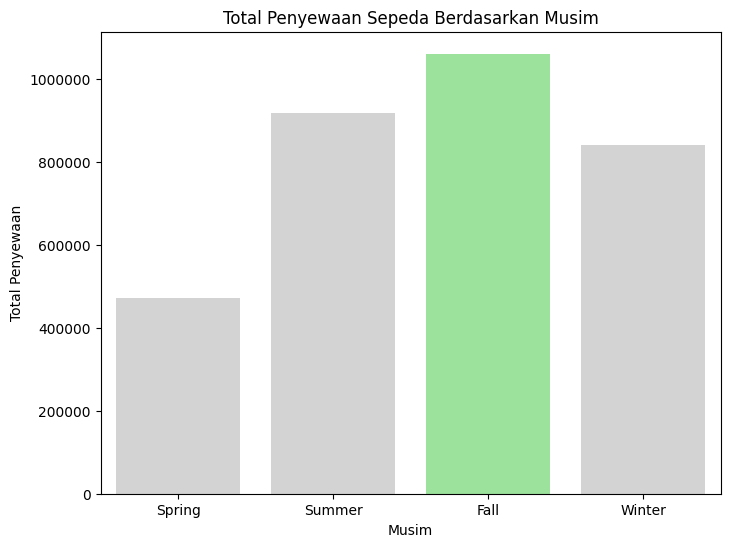

In [32]:
# Mapping untuk nama musim
season_names = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

# Kelompokkan data berdasarkan musim dan hitung total penyewaan per musim
season_group = df_day.groupby('season')['total_rentals'].sum().reset_index()
season_group['season_name'] = season_group['season'].map(season_names)

# Identifikasi nilai total penyewaan tertinggi
max_val = season_group['total_rentals'].max()

# Buat daftar warna: hijau jika nilainya == max_val, abu-abu untuk lainnya
colors = ['#90EE90' if val == max_val else '#D3D3D3' for val in season_group['total_rentals']]

# Plot bar chart dengan seaborn, menggunakan list warna
plt.figure(figsize=(8,6))
sns.barplot(x='season_name', y='total_rentals', data=season_group, palette=colors)
plt.title("Total Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan")
plt.ticklabel_format(style='plain', axis='y')

plt.show()

**Insight :**

Berdasarkan hasil visualisasi diatas, pada musim 3(fall/musim gugur) merupakan permintaan penyewaan sepeda paling tinggi dengan mendapatkan total jumlah penyewaan sepeda sebesar 1061129 sepeda sedangkan pemintaan penyewaan sepeda paling rendah terjadi pada musim 1 (springer/musim semi) dengan total sebesar 471348 sepeda.

### Pertanyaan 2: Seberapa besar hari libur berdampak pada jumlah penyewaan sepeda?

<ipython-input-33-d32bdaa6a9fa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday_label', y='mean', data=holiday_stats_day, palette=['#90EE90','#D3D3D3'])


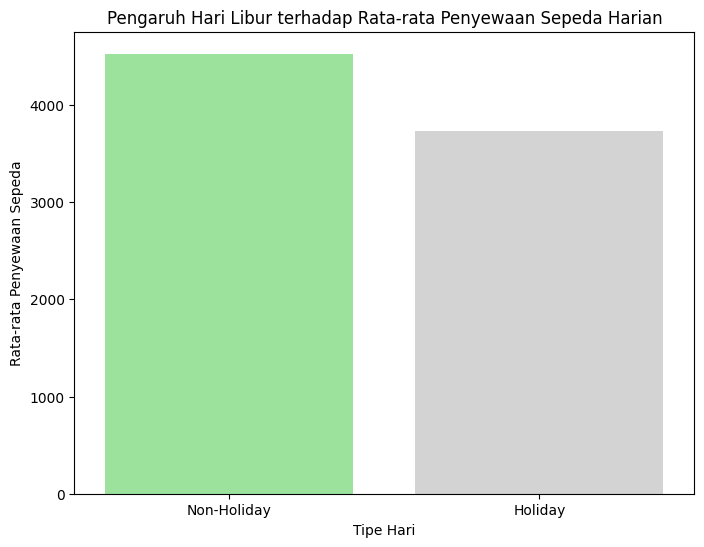

In [33]:
# Kelompokkan data berdasarkan hari libur dan hitung statistik total penyewaan per hari
holiday_stats_day = df_day.groupby('holiday')['total_rentals'].agg(['mean', 'sum', 'std', 'count']).reset_index()
# Mapping untuk label agar lebih mudah dibaca
holiday_stats_day['holiday_label'] = holiday_stats_day['holiday'].map({0: 'Non-Holiday', 1: 'Holiday'})

# Plot bar chart untuk membandingkan rata-rata penyewaan harian
plt.figure(figsize=(8,6))
sns.barplot(x='holiday_label', y='mean', data=holiday_stats_day, palette=['#90EE90','#D3D3D3'])
plt.title("Pengaruh Hari Libur terhadap Rata-rata Penyewaan Sepeda Harian")
plt.xlabel("Tipe Hari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

**Insight:**

berdasarkan hasil visualialisasi diatas, didapat bahwa rata-rata penyewaan sepeda pada weekdays atau hari kerja(non-holiday) lebih tinggi dibandingkan hari libur. Pada hari kerja(non-holiday) rata-rata penyewaan sepeda adalah 4527 per hari sedangkan pada hari libur(holiday) rata-rata penyewaan sepeda turun menjadi 3735 per hari.

jika dihitung persentasenya maka menjadi:
Penurunan per hari = 4527 – 3735 = 792 penyewaan
Persentase penurunan = (792 / 4527) × 100 ≈ 17.5%

Jadi hari libur memiliki dampak penurunan penyewaan sepeda dengan presentasi penurunan sebesar 17.5%

### Pertanyaan 3: Faktor mana yang memiliki pengaruh terbesar terhadap jumlah penyewaan sepeda?


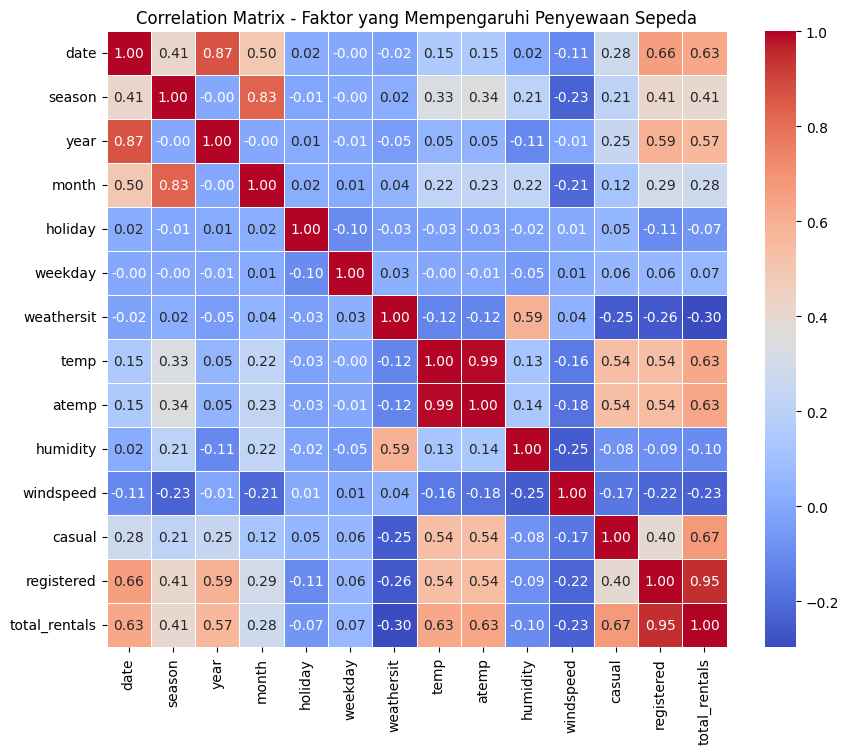

In [34]:
# Hitung matriks korelasi
corr_matrix = df_day.corr()

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Judul
plt.title("Correlation Matrix - Faktor yang Mempengaruhi Penyewaan Sepeda")

plt.show()

berdasarkan hasil correlation matrix diatas, didapat bahwa faktor yang paling berpengaruh terbesar terhadap jumlah penyewaan sepeda terdapat pada korelasi tertinggi dengan total_rentals adalah `registered`.
diikuti dengan variabel pengguna `casual` `atemp` `date` `temp` `year` `season`	`month` `windspeed` `weekday`.
sedangkan variabel `holiday` `humidity`  `weathersit` memiliki dampak negatif terhadap penyewaan sepeda.


### Pertanyaan 4: Apakah pengguna Registred dan pengguna casual memiliki pola penggunaan penyewaan sepeda yang berbeda?


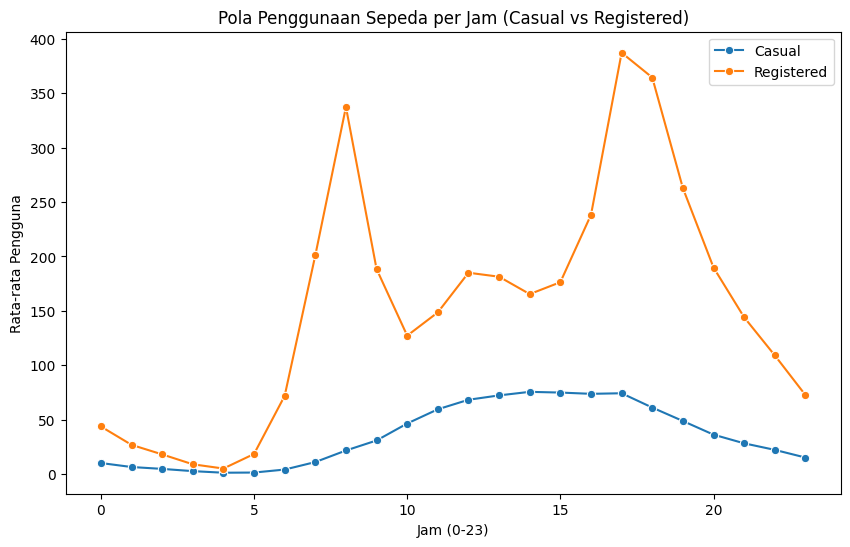

In [35]:
# Kelompokkan data berdasarkan jam, lalu hitung rata-rata pengguna casual dan registered
hour_group = df_hour.groupby('hour')[['casual', 'registered']].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='hour', y='casual', data=hour_group, label='Casual', marker='o')
sns.lineplot(x='hour', y='registered', data=hour_group, label='Registered', marker='o')

plt.title("Pola Penggunaan Sepeda per Jam (Casual vs Registered)")
plt.xlabel("Jam (0-23)")
plt.ylabel("Rata-rata Pengguna")
plt.legend()
plt.show()

**Insight:**

berdasarkan hasil visualisasi diatas, menunjukkan bahwa terdapat perbedaan pola pengguna casual dan registered dalam penyewaan sepeda, ini terlihat pada pola jam sibuk,
untuk pengguna registered memiliki 2 puncak penggunaan penyewaan sepeda yaitu pada pagi hari sekitar pukul 7-9 dan sore hari sekitar pukul 16-18 sedangkan pengguna casual memiliki pola yang lebih stabil sepanjang hari, dengan sedikit peningkatan pada siang/awal sore sekitar pukul 12-15.

### Pertanyaan 5: Pada jam berapa permintaan penyewaan sepeda paling tinggi?

<ipython-input-36-199314406d4a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='total_rentals', data=hourly_stats, palette=colors)


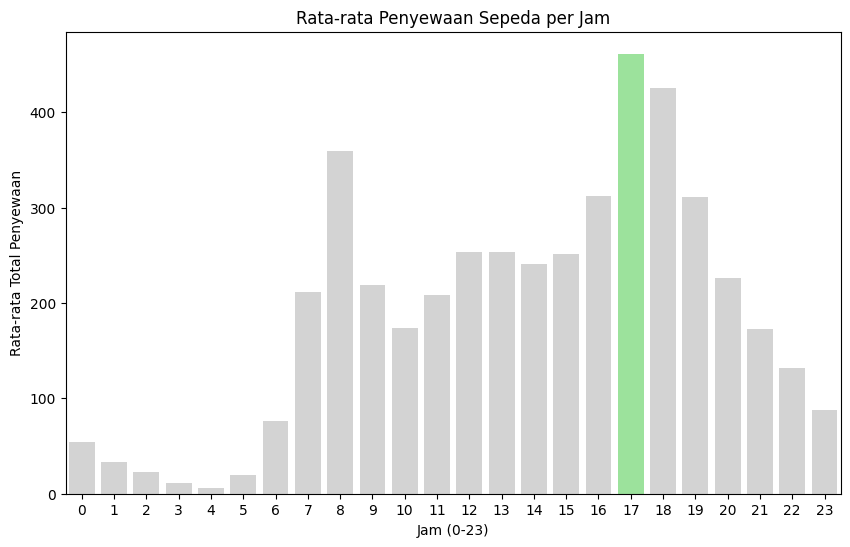

In [36]:
# Kelompokkan data berdasarkan jam dan hitung rata-rata total penyewaan
hourly_stats = df_hour.groupby('hour')['total_rentals'].mean().reset_index()

# Identifikasi nilai tertinggi
max_val = hourly_stats['total_rentals'].max()

# Buat daftar warna: gunakan hijau (misalnya "#008000") untuk nilai tertinggi, dan abu muda ("#D3D3D3") untuk yang lainnya
colors = ['#90EE90' if val == max_val else '#D3D3D3' for val in hourly_stats['total_rentals']]

plt.figure(figsize=(10,6))
sns.barplot(x='hour', y='total_rentals', data=hourly_stats, palette=colors)
plt.title("Rata-rata Penyewaan Sepeda per Jam")
plt.xlabel("Jam (0-23)")
plt.ylabel("Rata-rata Total Penyewaan")
plt.xticks(range(0, 24))  # Pastikan semua jam tampil di sumbu x
plt.show()

**Insight:**

berdasarkan hasil visualisasi diatas, menunjukkan bahwa pada jam 17 sore merupakan permintaan penyewaan sepeda paling tinggi

### Pertanyaan 6: Bagaimana perkembangan jumlah penyewaan sepeda dari tahun 2011 hingga tahun 2012?

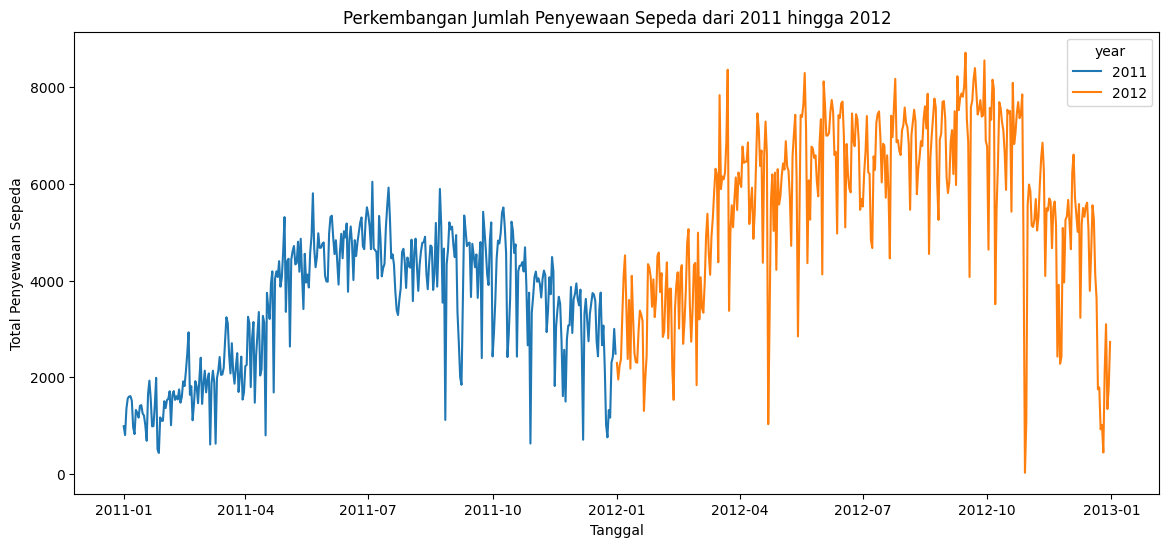

In [37]:
# 1. Buat salinan dataset
dummy_df = df_day.copy()

# 2. Tambahkan kolom label tahun di dummy_df (0 -> '2011', 1 -> '2012')
dummy_df['year'] = dummy_df['year'].map({0: '2011', 1: '2012'})

# 3. Visualisasi perkembangan jumlah penyewaan dari 2011 hingga 2012
plt.figure(figsize=(14, 6))
sns.lineplot(data=dummy_df, x='date', y='total_rentals', hue='year', palette='tab10')
plt.title("Perkembangan Jumlah Penyewaan Sepeda dari 2011 hingga 2012")
plt.xlabel("Tanggal")
plt.ylabel("Total Penyewaan Sepeda")
plt.show()

**Insight:**
- Secara keseluruhan, jumlah penyewaan sepeda meningkat pada tahun 2012 dibandingkan tahun 2011. Ini ditunjukkan oleh pola peningkatan saat musim semi dan panas dan penurunan saat musim dingin


## Analisis Lanjutan (Opsional)

**RFM Analysis**

**Recency** = Kapan terakhir kali pengguna casual dan registed menyewa sepeda?

**Frequency** = seberapa sering pengguna menyewa sepeda?

**Monetary** = Berapa total jumlah penyewaan yang dilakukan oleh pengguna?

In [38]:
# === Recency: Kapan terakhir kali pengguna casual dan registered menyewa sepeda? ===
# Filter data untuk hari-hari di mana terjadi penyewaan (nilai > 0)
# dan ambil tanggal maksimum untuk masing-masing segmen
last_date_casual = df_day[df_day['casual'] > 0]['date'].max()
last_date_registered = df_day[df_day['registered'] > 0]['date'].max()

# Ambil jumlah penyewaan pada hari terakhir masing-masing segmen
casual_rentals_on_last = df_day.loc[df_day['date'] == last_date_casual, 'casual'].iloc[0]
registered_rentals_on_last = df_day.loc[df_day['date'] == last_date_registered, 'registered'].iloc[0]

# Buat tabel recency
recency_table = pd.DataFrame({
    'User_Type': ['Casual', 'Registered'],
    'Last_Rental_Date': [last_date_casual, last_date_registered],
    'Total_Rentals_on_Last_Date': [casual_rentals_on_last, registered_rentals_on_last]
})

# === Frequency: Rata-rata penyewaan per hari untuk masing-masing segmen ===
casual_frequency = df_day['casual'].mean()
registered_frequency = df_day['registered'].mean()

# === Monetary: Total jumlah penyewaan selama periode pengamatan untuk masing-masing segmen ===
casual_total = df_day['casual'].sum()
registered_total = df_day['registered'].sum()



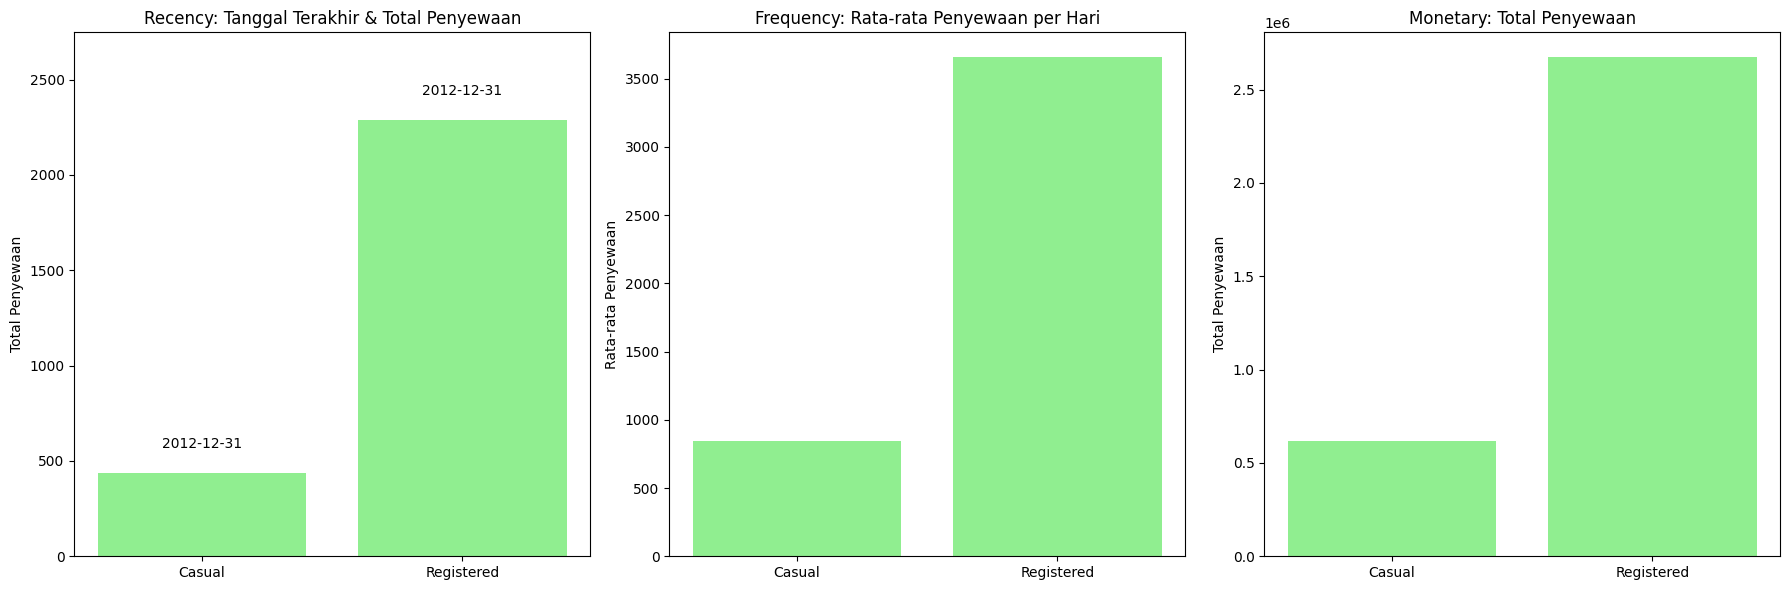

In [39]:
# === Visualisasi ===
# Buat figure dengan 3 subplots (1 row x 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Subplot 1: Recency
axs[0].bar(recency_table['User_Type'], recency_table['Total_Rentals_on_Last_Date'],
           color=['lightgreen', 'lightgreen'])
axs[0].set_title("Recency: Tanggal Terakhir & Total Penyewaan")
axs[0].set_ylabel("Total Penyewaan")
# Atur batas atas (ylim) agar teks tidak tumpang tindih dengan tepi atas
max_height = recency_table['Total_Rentals_on_Last_Date'].max()
axs[0].set_ylim(0, max_height * 1.2)

# Tambahkan anotasi tanggal di atas masing-masing bar
for i, row in recency_table.iterrows():
    date_str = row['Last_Rental_Date'].strftime("%Y-%m-%d")
    bar_height = row['Total_Rentals_on_Last_Date']
    axs[0].text(
        i,
        bar_height + (max_height * 0.05),  # Beri jarak 5% dari ketinggian bar tertinggi
        date_str,
        ha='center', va='bottom', fontsize=10
    )

# Subplot 2: Frequency
axs[1].bar(['Casual', 'Registered'], [casual_frequency, registered_frequency],
           color=['lightgreen', 'lightgreen'])
axs[1].set_title("Frequency: Rata-rata Penyewaan per Hari")
axs[1].set_ylabel("Rata-rata Penyewaan")

# Subplot 3: Monetary
axs[2].bar(['Casual', 'Registered'], [casual_total, registered_total],
           color=['lightgreen', 'lightgreen'])
axs[2].set_title("Monetary: Total Penyewaan")
axs[2].set_ylabel("Total Penyewaan")

plt.tight_layout()
plt.show()

**Clustering**

analisis clustering

- mengelompokkan jumlah penyewaan sepeda berdasarkan musim
- mengelompokkan suhu (temp) ke dalam kategori (cold, normal, hot) untuk melihat dampaknya pada jumlah penyewaan
- mengelompokkan pengguna penyewaan sepeda berdasarkan terakhir penyewaan sepeda per hari
  
  Kategori Binning Recency:
  
  Frequent Users: ≤7 hari sejak penyewaan terakhir
  Moderate Users: 8-30 hari sejak penyewaan terakhir
  Inactive Users: >30 hari sejak penyewaan terakhir

In [40]:
# 1. Buat salinan dataset agar tidak mengubah dataset asli
dummy_df = df_day.copy()

# 2. Clustering berdasarkan musim
# Hitung total penyewaan (total_rentals) per musim
season_group = dummy_df.groupby('season')['total_rentals'].sum().reset_index()

# Ubah label musim (bisa disesuaikan)
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
season_group['season_name'] = season_group['season'].map(season_labels)


# 3. Clustering berdasarkan kategori suhu (Cold, Normal, Hot)
#   - Gunakan kolom 'atemp' dari dummy_df, jangan ubah df_day
def categorize_temp(t):
    if t < 15:
        return 'Cold'
    elif t < 25:
        return 'Normal'
    else:
        return 'Hot'

# Buat kolom 'temp_category' di dummy_df
dummy_df['temp_category'] = dummy_df['atemp'].apply(categorize_temp)

# Definisikan urutan kategori yang diharapkan
expected_categories = ['Cold', 'Normal', 'Hot']
dummy_df['temp_category'] = pd.Categorical(dummy_df['temp_category'],
                                           categories=expected_categories,
                                           ordered=True)

# Hitung total penyewaan (total_rentals) per kategori suhu
temp_group = dummy_df.groupby('temp_category')['total_rentals'].sum()
# Pastikan semua kategori muncul, jika tidak ada, diisi dengan 0
temp_group = temp_group.reindex(expected_categories, fill_value=0).reset_index()


# 4. Clustering berdasarkan Recency (terakhir penyewaan per hari)
#   - Tentukan tanggal terakhir dalam data
last_date = dummy_df['date'].max()
#   - Hitung recency (selisih hari) untuk setiap baris
dummy_df['recency_days'] = (last_date - dummy_df['date']).dt.days

def categorize_recency(days):
    if days <= 7:
        return 'Frequent Users'
    elif days <= 30:
        return 'Moderate Users'
    else:
        return 'Inactive Users'

dummy_df['recency_category'] = dummy_df['recency_days'].apply(categorize_recency)
recency_group = dummy_df.groupby('recency_category')['total_rentals'].sum().reset_index()

# Urutkan kategori recency
order = ['Frequent Users', 'Moderate Users', 'Inactive Users']
recency_group['recency_category'] = pd.Categorical(recency_group['recency_category'],
                                                   categories=order,
                                                   ordered=True)
recency_group = recency_group.sort_values('recency_category')



<ipython-input-40-3f3b44dbb85d>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_group = dummy_df.groupby('temp_category')['total_rentals'].sum()


In [41]:
# Tampilkan tabel total penyewaan per musim
print("Tabel: Total Penyewaan per Musim")
print(season_group[['season_name', 'total_rentals']])
print("\n" + "="*50 + "\n")

# Tampilkan tabel total penyewaan berdasarkan kategori suhu
print("Tabel: Total Penyewaan berdasarkan Kategori Suhu")
print(temp_group)
print("\n" + "="*50 + "\n")

# Tampilkan tabel total penyewaan berdasarkan kategori recency
print("Tabel: Total Penyewaan berdasarkan Kategori Recency")
print(recency_group)
print("\n" + "="*50 + "\n")

# 5. Tabel Tren Penyewaan dalam 7 Hari Terakhir
last_7_days = dummy_df[dummy_df['date'] >= last_date - pd.Timedelta(days=6)]
print("Tabel: Penyewaan Sepeda dalam 7 Hari Terakhir")
print(last_7_days[['date', 'total_rentals']])


Tabel: Total Penyewaan per Musim
  season_name  total_rentals
0      Spring         471348
1      Summer         918589
2        Fall        1061129
3      Winter         841613


Tabel: Total Penyewaan berdasarkan Kategori Suhu
  temp_category  total_rentals
0          Cold         311070
1        Normal         983188
2           Hot        1998421


Tabel: Total Penyewaan berdasarkan Kategori Recency
  recency_category  total_rentals
0   Frequent Users          13449
2   Moderate Users         110264
1   Inactive Users        3168966


Tabel: Penyewaan Sepeda dalam 7 Hari Terakhir
          date  total_rentals
724 2012-12-25           1013
725 2012-12-26            441
726 2012-12-27           2114
727 2012-12-28           3095
728 2012-12-29           1341
729 2012-12-30           1796
730 2012-12-31           2729


In [42]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           731 non-null    datetime64[ns]
 1   season         731 non-null    int64         
 2   year           731 non-null    int64         
 3   month          731 non-null    int64         
 4   holiday        731 non-null    int64         
 5   weekday        731 non-null    int64         
 6   weathersit     731 non-null    int64         
 7   temp           731 non-null    float64       
 8   atemp          731 non-null    float64       
 9   humidity       731 non-null    float64       
 10  windspeed      731 non-null    float64       
 11  casual         731 non-null    int64         
 12  registered     731 non-null    int64         
 13  total_rentals  731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 80.1 KB


## Conclusion

- Conclution pertanyaan 1 : Pada musim apa permintaan penyewaan sepeda paling tinggi dan paling rendah?

  - Jadi untuk permintaan penyewaan sepeda paling tinggi terjadi pada musim 3(fall/musim gugur) dengan mendapatkan total jumlah penyewaan sepeda sebesar 1061129 sepeda dihitung dari tahun 2011 sampai akhir tahun 2012 sedangkan pemintaan penyewaan sepeda paling rendah terjadi pada musim 1 (springer/musim semi) dengan total sebesar 471348 sepeda dihitung dari tahun 2011 sampai akhir tahun 2012.
  ini menunjukkan bahwa orang-orang lebih sering menyewa sepeda pada musim gugur karena biasanya pada musim ini suhu lebih stabil dan nyaman sedangkan pada musim semi orang-orang jarang menyewa sepeda karena seringkali cuaca diluar ruangan memiliki suhu dingin di awal periode dan hujan yang cukup sering

- Conclution pertanyaan 2 : Seberapa besar hari libur berdampak pada jumlah penyewaan sepeda?

  - Berdasarkan hasil analisis yang sudah dilakukan, hari libur memiliki dampak penurunan terhadap jumlah penyewaan sepeda dengan presentasi penurunan sebesar 17.5%. Pada hari kerja(non-holiday) rata-rata penyewaan sepeda adalah 4527 per hari cenderung lebih tinggi dibandingkan pada hari libur(holiday) rata-rata penyewaan sepeda turun menjadi 3735 per hari.

-  Conclution pertanyaan 3 :  Faktor mana yang memiliki pengaruh terbesar terhadap jumlah penyewaan sepeda?

  - faktor yang paling berpengaruh terbesar terhadap jumlah penyewaan sepeda terdapat pada korelasi tertinggi dengan total_rentals adalah `registered` nilai korelasinya sebesar 0.945517.
diikuti dengan variabel pengguna `casual` kemudian `atemp` `date` `temp` `year` `season`	`month` `windspeed` `weekday` yang memiliki korelasi positif terhadap jumlah penyewaan sepeda.
sedangkan variabel `holiday` `humidity`  `weathersit` memiliki dampak negatif terhadap penyewaan sepeda.
ini menunjukkan bahwa Menjaga kepuasan dan retensi pengguna terdaftar sangat penting karena mereka paling berpengaruh pada total penyewaan.

- Conclution pertanyaan 4 : Apakah pengguna Registred dan pengguna casual memiliki pola penggunaan penyewaan sepeda yang berbeda?

 - Terdapat perbedaan pola pengguna casual dan registered dalam penyewaan sepeda, ini terlihat pada pola jam sibuk,
untuk pengguna registered memiliki 2 peningkatan penggunaan penyewaan sepeda yaitu pada pagi hari sekitar pukul 7-9 dan sore hari sekitar pukul 16-18 sedangkan pengguna casual memiliki pola yang lebih stabil sepanjang hari, dengan sedikit peningkatan pada siang/awal sore sekitar pukul 12-15.

- Conclution pertanyaan 5 : Pada jam berapa permintaan penyewaan sepeda paling tinggi?

  - apabila dianalisis dari tahun 2011 sampai akhir tahun 2012 permintaan penyewaan sepeda paling tinggi terjadi pada pukul 17 sore dengan total jumlah penyewaan sepeda sebesar 336860.

- Conclution pertanyaan 6 : Bagaimana perkembangan jumlah penyewaan sepeda dari tahun 2011 hingga tahun 2012?

  - jumlah penyewaan sepeda meningkat pada tahun 2012 dibandingkan tahun 2011 yang cenderung lebih rendah. ini menunjukkan bahwa pertumbuhan popularitas layanan bike-sharing secara keseluruhan meningkat secara signifikan dari tahun 2011 ke 2012.